In [126]:
import os
import sys
import requests
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
import numpy as np
import cv2
from matplotlib.patches import Rectangle

In [119]:
if 'COMPUTER_VISION_SUBSCRIPTION_KEY' in os.environ:
    subscription_key = os.environ['COMPUTER_VISION_SUBSCRIPTION_KEY']
else:
    print("\nSet the COMPUTER_VISION_SUBSCRIPTION_KEY environment variable.\n**Restart your shell or IDE for changes to take effect.**")
    sys.exit()

In [120]:
if 'COMPUTER_VISION_ENDPOINT' in os.environ:
    endpoint = os.environ['COMPUTER_VISION_ENDPOINT']

In [121]:
# Analyze an Image:
# This example detects faces in a remote image, gets their gender and age with bounding boxes
# also describe the objects
# computer_vision_action_url = endpoint + "vision/v3.1/analyze"

# Detect object in a Image:
# This example detects different kinds of objects with bounding boxes in a image
# computer_vision_action_url = endpoint + "vision/v3.1/detect"

# Describe an Image:
# This API describes the image with the confidence score.
# computer_vision_action_url = endpoint + "vision/v3.1/describe"

## Describe image stored on disk

In [55]:
image_path = './demoIdCard.png'

In [56]:
# Read the image into a byte array
image_data = open(image_path, "rb").read()
headers = {'Ocp-Apim-Subscription-Key': subscription_key,
           'Content-Type': 'application/octet-stream'}
params = {'visualFeatures': 'Categories,Description,Color'}
response = requests.post(
    computer_vision_action_url, headers=headers, params=params, data=image_data)
response.raise_for_status()

# The 'analysis' object contains various fields that describe the image. The most
# relevant caption for the image is obtained from the 'description' property.
analysis = response.json()
print(analysis)

{'description': {'tags': ['graphical user interface', 'text', 'application'], 'captions': [{'text': 'graphical user interface, text, application', 'confidence': 0.8205951452255249}]}, 'requestId': 'e2d97164-5cac-48ca-9605-1ff8a187bf75', 'metadata': {'height': 490, 'width': 844, 'format': 'Png'}}


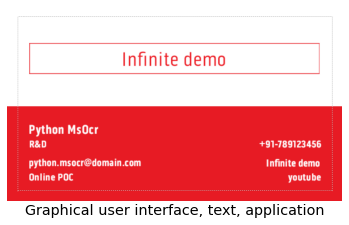

In [30]:
image_caption = analysis["description"]["captions"][0]["text"].capitalize()

# Display the image and overlay it with the caption.
image = Image.open(BytesIO(image_data))
plt.imshow(image)
plt.axis("off")
_ = plt.title(image_caption, size="x-large", y=-0.1)
plt.show()

## Describe image retrieved via URL

In [122]:
#image_url = "https://docs.microsoft.com/en-us/azure/cognitive-services/computer-vision/images/windows-kitchen.jpg"
image_url = "https://static01.nyt.com/images/2020/11/19/us/artificial-intelligence-fake-people-faces-promo-1605818328743/artificial-intelligence-fake-people-faces-promo-1605818328743-superJumbo-v2.jpg"

In [123]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key}
params = {'visualFeatures': 'Categories,Description,Color,faces,adult,'}
data = {'url': image_url}
response = requests.post(computer_vision_action_url, headers=headers, params=params, json=data)
response.raise_for_status()

# The 'analysis' object contains various fields that describe the image. The most
# relevant caption for the image is obtained from the 'description' property.
analysis = response.json()

In [66]:
print(analysis)

{'categories': [{'name': 'people_group', 'score': 0.98828125, 'detail': {'celebrities': []}}], 'adult': {'isAdultContent': False, 'isRacyContent': False, 'isGoryContent': False, 'adultScore': 0.00043002262827940285, 'racyScore': 0.0007141171954572201, 'goreScore': 3.843554077320732e-05}, 'color': {'dominantColorForeground': 'Brown', 'dominantColorBackground': 'Grey', 'dominantColors': ['Grey', 'Brown'], 'accentColor': '5C8249', 'isBwImg': False, 'isBWImg': False}, 'description': {'tags': ['posing', 'person', 'standing', 'group', 'people', 'female', 'friends'], 'captions': [{'text': 'a collage of a person', 'confidence': 0.4865979850292206}]}, 'faces': [{'age': 41, 'gender': 'Male', 'faceRectangle': {'left': 1284, 'top': 588, 'width': 236, 'height': 236}}, {'age': 26, 'gender': 'Female', 'faceRectangle': {'left': 881, 'top': 591, 'width': 235, 'height': 235}}, {'age': 32, 'gender': 'Female', 'faceRectangle': {'left': 1285, 'top': 992, 'width': 234, 'height': 234}}, {'age': 32, 'gender':

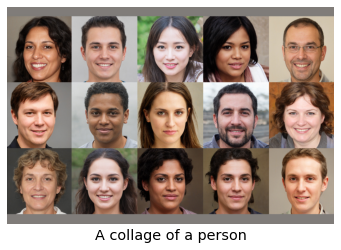

In [103]:
image_caption = analysis["description"]["captions"][0]["text"].capitalize()
arr = np.asarray( bytearray( requests.get( image_url ).content ), dtype=np.uint8 )
img = cv2.cvtColor( cv2.imdecode( arr, -1 ), cv2.COLOR_BGR2RGB )
plt.imshow(img)
plt.axis("off")
_ = plt.title(image_caption, size="x-large", y=-0.1)
plt.show()

In [ ]:
analysis["faces"]

In [112]:
plt.figure(figsize=(10, 10))
image_caption = analysis["description"]["captions"][0]["text"].capitalize()
image = Image.open(BytesIO(requests.get(image_url).content))
ax = plt.imshow(image, alpha=0.5)
for person in analysis["faces"]:
    #bbox = [int(num) for num in analysis["faces"].split(",")]
    bbox = person["faceRectangle"]
    #print(bbox)
    text = f"{person['age']}-{person['gender']}"
    origin = (bbox["left"], bbox["top"])
    patch = Rectangle(origin, bbox["width"],bbox["height"],
                      fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(origin[0], origin[1], text, fontsize=10, va="top")
plt.axis("off")
plt.title(image_caption, size="x-large", y=-0.1)
plt.show()

KeyError: 'description'

<Figure size 720x720 with 0 Axes>

In [124]:
print(analysis)

{'description': {'tags': ['posing', 'person', 'standing', 'group', 'people', 'female', 'friends'], 'captions': [{'text': 'a collage of a person', 'confidence': 0.4865977168083191}]}, 'requestId': 'f7163ace-d9c0-4fbd-8d04-7abf68668a82', 'metadata': {'height': 1331, 'width': 2000, 'format': 'Jpeg'}}
